# DATA PREPROCESSING

In [1]:
cd desktop

C:\Users\hp\desktop


In [2]:
cd New folder (3)

C:\Users\hp\desktop\New folder (3)


In [3]:
#Importing Libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.calibration import CalibratedClassifierCV
sns.set()
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split


In [4]:
# train data
train_data = pd.read_csv('train_v2.csv')
# members data
members_data = pd.read_csv('members_v3.csv')
# transactions data
transactions_data = pd.read_csv('transactions_v2.csv')
# user logs data
logs_data = pd.read_csv('user_logs_v2.csv')


In [5]:
# merging members data with train data
train_members = pd.merge(train_data, members_data, on='msno', how='left')

# merging transactions data with train members data
train_mem_trans = pd.merge(train_members, transactions_data, on='msno', how='left')

# merging user logs data with train members transaction data
train_dataset = pd.merge(train_mem_trans, logs_data, on='msno', how='left')

# getting head of train dataset
#pd.set_option('display.max_columns', 100)
train_dataset.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,...,membership_expire_date,is_cancel,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0,NaN,NaN,NaN,...,NaN,NaN,20170305.0,7.0,0.0,3.0,5.0,71.0,68.0,17599.893
1,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0,NaN,NaN,NaN,...,NaN,NaN,20170301.0,138.0,19.0,7.0,1.0,21.0,158.0,8830.433
2,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0,NaN,NaN,NaN,...,NaN,NaN,20170319.0,0.0,0.0,0.0,0.0,34.0,17.0,7883.313
3,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0,NaN,NaN,NaN,...,NaN,NaN,20170316.0,15.0,0.0,0.0,1.0,38.0,17.0,9029.227
4,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0,NaN,NaN,NaN,...,NaN,NaN,20170310.0,0.0,0.0,0.0,0.0,8.0,8.0,1870.110


In [6]:
train_dataset.isnull().sum()

msno                            1
is_churn                        0
city                       117167
bd                         117167
gender                    7860346
registered_via             117167
registration_init_time     117167
payment_method_id          340642
payment_plan_days          340642
plan_list_price            340642
actual_amount_paid         340642
is_auto_renew              340642
transaction_date           340642
membership_expire_date     340642
is_cancel                  340642
date                       249615
num_25                     249615
num_50                     249615
num_75                     249615
num_985                    249615
num_100                    249615
num_unq                    249615
total_secs                 249615
dtype: int64

In [7]:
# https://stackoverflow.com/questions/43889611/median-of-panda-datetime64-column
dates = list(train_dataset.sort_values('registration_init_time')['registration_init_time'])
print(dates[len(dates)//2])

20131114.0


In [8]:
# impute median date for registration_init_time .
train_dataset['registration_init_time'] = train_dataset['registration_init_time'].fillna(20131114.0)

In [9]:
train_dataset.isnull().sum()

msno                            1
is_churn                        0
city                       117167
bd                         117167
gender                    7860346
registered_via             117167
registration_init_time          0
payment_method_id          340642
payment_plan_days          340642
plan_list_price            340642
actual_amount_paid         340642
is_auto_renew              340642
transaction_date           340642
membership_expire_date     340642
is_cancel                  340642
date                       249615
num_25                     249615
num_50                     249615
num_75                     249615
num_985                    249615
num_100                    249615
num_unq                    249615
total_secs                 249615
dtype: int64

In [10]:
def preprocess(data):
    # imputing 0 in place of nan values in the city column
    data['city'] = data['city'].fillna(0)
    
    # removing outliers
    data['bd'] = data['bd'].apply(lambda x: x if (x < 69.0) and (x > 0.0) else np.nan)
    # imputing 28 as age instead of nan
    data['bd'] = data['bd'].fillna(28.0)
    
    # replacing male with 1 in gender
    data['gender'] = data['gender'].replace(to_replace='male', value=1)
    # replacing male with 2 in gender
    data['gender'] = data['gender'].replace(to_replace='female', value=2)
    # replacing nan with 0 in gender
    data['gender'] = data['gender'].fillna(0)
    
    # replace 0 instead of nan in registered_via
    data['registered_via'] = data['registered_via'].fillna(0)
    
    # filling median date in place of nan in the df
    data['registration_init_time'] = data['registration_init_time'].fillna(20151010.0)
    # converting float date to datetime
    # data['registration_init_time'] = pd.to_datetime(data['registration_init_time'], format='%Y%m%d')
    
    # replace 0 instead of nan in registered_via
    data['registered_via'] = data['registered_via'].fillna(0)
    
    # removing outliers
    data['payment_plan_days'] = data['payment_plan_days'].apply(lambda x: x if (x <= 30.0) else np.nan)
    # imputing 30 in place of nan in payment_plan_days
    data['payment_plan_days'] = data['payment_plan_days'].fillna(30.0)
    
    # removing outliers
    data['plan_list_price'] = data['plan_list_price'].apply(lambda x: x if (x <= 180.0) else np.nan)
    # imputing 149 in place of nan in plan_list_price
    data['plan_list_price'] = data['plan_list_price'].fillna(149.0)
    
    # imputing 0 in place of nan value in payment_method_id
    data['payment_method_id'] = data['payment_method_id'].fillna(0)
    
    # removing outliers
    data['actual_amount_paid'] = data['actual_amount_paid'].apply(lambda x: x if (x <= 180.0) else np.nan)
    # imputing 149 in place of nan in actual_amount_paid
    data['actual_amount_paid'] = data['actual_amount_paid'].fillna(149.0)
    
    # imputing 2 in place of nan values in is_auto_renew
    data['is_auto_renew'] = data['is_auto_renew'].fillna(2)
    
    # filling median date in place of nan in the df
    data['transaction_date'] = data['transaction_date'].fillna(20170311.0)
    # converting float date to datetime
    # data['transaction_date'] = pd.to_datetime(data['transaction_date'], format='%Y%m%d')
    
    # filling median date in place of nan in the df
    data['membership_expire_date'] = data['membership_expire_date'].fillna(20170421.0)
    # converting float date to datetime
    # data['membership_expire_date'] = pd.to_datetime(data['membership_expire_date'], format='%Y%m%d')
    
    # imputing 2 in place of nan values in is_cancel
    data['is_cancel'] = data['is_cancel'].fillna(2)
    
    # filling median date in place of nan in the df
    data['date'] = data['date'].fillna(20170316.0)
    # converting float date to datetime
    # data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')
    
    # removing outliers
    data['num_25'] = data['num_25'].apply(lambda x: x if (x <= 15.0) else np.nan)
    # now I can impute 2 instead of nan in num_25
    data['num_25'] = data['num_25'].fillna(2.0)
    
    # removing outliers
    data['num_50'] = data['num_50'].apply(lambda x: x if (x <= 4.0) else np.nan)
    # now I can impute 0 instead of nan in num_50
    data['num_50'] = data['num_50'].fillna(1.0)

    # removing outliers
    data['num_75'] = data['num_75'].apply(lambda x: x if (x <= 3.0) else np.nan)
    # now I can impute 0 instead of nan in num_75
    data['num_75'] = data['num_75'].fillna(0)

    # removing outliers
    data['num_985'] = data['num_985'].apply(lambda x: x if (x <= 3.0) else np.nan)
    # now I can impute 0 instead of nan in num_985
    data['num_985'] = data['num_985'].fillna(0)

    # removing outliers
    data['num_100'] = data['num_100'].apply(lambda x: x if (x <= 74.0) else np.nan)
    # now I can impute 14 instead of nan in num_100
    data['num_100'] = data['num_100'].fillna(17.0)
    
    # removing outliers
    data['num_unq'] = data['num_unq'].apply(lambda x: x if (x <= 68.0) else np.nan)
    # now I can impute 16 instead of nan in num_unq
    data['num_unq'] = data['num_unq'].fillna(18.0)

    # removing outliers
    data['total_secs'] = data['total_secs'].apply(lambda x: x if (x <= 19167.549700000025) else np.nan)
    # now I can impute 3880.765 instead of nan in total_secs
    data['total_secs'] = data['total_secs'].fillna(4588.99)

In [11]:
preprocess(train_dataset)

#  Preaparing Dataset

In [12]:
train_dataset.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,...,membership_expire_date,is_cancel,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,1.0,3.0,20131223.0,0.0,30.0,149.0,...,20170421.0,2.0,20170305.0,7.0,0.0,3.0,0.0,71.0,68.0,17599.893
1,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,1.0,3.0,20131223.0,0.0,30.0,149.0,...,20170421.0,2.0,20170301.0,2.0,1.0,0.0,1.0,21.0,18.0,8830.433
2,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,1.0,3.0,20131223.0,0.0,30.0,149.0,...,20170421.0,2.0,20170319.0,0.0,0.0,0.0,0.0,34.0,17.0,7883.313
3,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,1.0,3.0,20131223.0,0.0,30.0,149.0,...,20170421.0,2.0,20170316.0,15.0,0.0,0.0,1.0,38.0,17.0,9029.227
4,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,1.0,3.0,20131223.0,0.0,30.0,149.0,...,20170421.0,2.0,20170310.0,0.0,0.0,0.0,0.0,8.0,8.0,1870.110


In [13]:
train_dataset.shape

(16887877, 23)

In [14]:
mean_encode = train_dataset.groupby('city')['is_churn'].mean()
print(mean_encode)
train_dataset.loc[:, 'city_mean_enc'] = train_dataset['city'].map(mean_encode)

city
0.0     0.083906
1.0     0.069631
3.0     0.131210
4.0     0.133819
5.0     0.132687
6.0     0.127799
7.0     0.106309
8.0     0.142899
9.0     0.125337
10.0    0.132318
11.0    0.107256
12.0    0.139945
13.0    0.127451
14.0    0.126532
15.0    0.122181
16.0    0.117568
17.0    0.089775
18.0    0.112245
19.0    0.140959
20.0    0.079720
21.0    0.143717
22.0    0.119596
Name: is_churn, dtype: float64


In [18]:
#del train_dataset["city"]

In [19]:
mean_encode = train_dataset.groupby('gender')['is_churn'].mean()
print(mean_encode)
train_dataset.loc[:, 'gender_mean_enc'] = train_dataset['gender'].map(mean_encode)
del train_dataset["gender"]

gender
0.0    0.074407
1.0    0.127283
2.0    0.127856
Name: is_churn, dtype: float64


In [20]:
mean_encode = train_dataset.groupby('payment_method_id')['is_churn'].mean()
print(mean_encode)
train_dataset.loc[:, 'payment_method_id_mean_enc'] = train_dataset['payment_method_id'].map(mean_encode)
del train_dataset["payment_method_id"]

payment_method_id
0.0     0.639020
3.0     1.000000
6.0     1.000000
8.0     0.865285
10.0    0.124386
11.0    0.022314
12.0    0.951889
13.0    0.995950
14.0    0.053262
15.0    0.906367
16.0    0.167891
17.0    0.896575
18.0    0.013494
19.0    0.025338
20.0    0.992867
21.0    0.058543
22.0    0.994973
23.0    0.058279
26.0    0.614559
27.0    0.033850
28.0    0.236563
29.0    0.093128
30.0    0.076637
31.0    0.022201
32.0    0.962634
33.0    0.035992
34.0    0.032045
35.0    0.874412
36.0    0.094281
37.0    0.027622
38.0    0.276105
39.0    0.055032
40.0    0.065111
41.0    0.054628
Name: is_churn, dtype: float64


In [22]:
mean_encode = train_dataset.groupby('registered_via')['is_churn'].mean()
print(mean_encode)
train_dataset.loc[:, 'registered_via_mean_enc'] = train_dataset['registered_via'].map(mean_encode)
del train_dataset["registered_via"]

registered_via
0.0     0.083906
3.0     0.148928
4.0     0.200675
7.0     0.060007
9.0     0.123385
13.0    0.054955
Name: is_churn, dtype: float64


In [23]:
mean_encode = train_dataset.groupby('is_auto_renew')['is_churn'].mean()
print(mean_encode)
train_dataset.loc[:, 'is_auto_renew_mean_enc'] = train_dataset['is_auto_renew'].map(mean_encode)
del train_dataset["is_auto_renew"]

is_auto_renew
0.0    0.345851
1.0    0.055092
2.0    0.639020
Name: is_churn, dtype: float64


In [24]:
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('msno') and str(feature_name)!=str('is_churn')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1


train_data = normalize(train_dataset)

In [25]:
Y_train = train_data['is_churn'].values
train_data.drop(['is_churn','msno'], axis=1, inplace=True)

In [26]:
X_train = train_data

In [27]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.8, stratify=Y_train)
X_train, X_cv, Y_train, Y_cv = train_test_split(X_train, Y_train, test_size=0.2, stratify=Y_train)

In [28]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
print(X_cv.shape, Y_cv.shape)

(2702060, 21) (2702060,)
(13510302, 21) (13510302,)
(675515, 21) (675515,)


In [29]:
train_features = X_train.columns

In [30]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'


from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier


from datetime import datetime
from sklearn.calibration import CalibratedClassifierCV
from matplotlib.pyplot import figure

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
import seaborn as sns
import matplotlib.pyplot as plt
def result(y_pred,y_pred_proba,y_true,confusion=0,silent=0):
    """
    Function require 3 inputs
    predicted value
    predicted probabilities
    true labels
    final 1 or 0 
    if 1 confusion matrix will be printed
    """
    loss=log_loss(y_true,y_pred_proba)
    if silent==0:
        print("log loss is ",loss)
        print('F1 score is',f1_score(y_true,y_pred))
    if confusion==1:
        cf_matrix = confusion_matrix(y_true, y_pred)
        sns.heatmap(cf_matrix, annot=True,fmt='d')
        plt.show()
    return loss

def lowest(hyperparameter,loss_all):
    """
    this function return the
    best hyperparameter and lowest loss associated with it
    """
    lowest_loss_index=np.argsort(loss_all)[0]
    lowest_loss=loss_all[lowest_loss_index]
    hyperparameter=hyperparameter[lowest_loss_index]
    print( 'The best hyperparameter is ',hyperparameter,'and the lowest loss associaed with it ',lowest_loss)
    return hyperparameter
def plot_result(hyperparameter,loss_all):
    figure(num=None, figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
    sns.scatterplot(x=hyperparameter,y=loss_all)
    plt.plot()

In [32]:
def misclassified_points(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)

# Random Model

In [33]:
test_data_len = X_test.shape[0]
cv_data_len = X_cv.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,2))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,2)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(Y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,2))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,2)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(Y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
misclassified_points(Y_test, predicted_y+1)

Log loss on Cross Validation Data using Random Model 0.8867463832725058
Log loss on Test Data using Random Model 0.886241617568117
Number of misclassified points  94.8542823098995


# Logistic Regression with L2 penalty

Model is training
Done
log loss is  0.6121487960846135
F1 score is 0.4508206991605062
Model is training
Done
log loss is  0.524313667973394
F1 score is 0.4578912973957537
Model is training
Done
log loss is  0.49890000204491586
F1 score is 0.45599969360007153
Model is training
Done
log loss is  0.49765779206164146
F1 score is 0.4503966261672859
Model is training
Done
log loss is  0.497999715322589
F1 score is 0.4506765191732973
Model is training
Done
log loss is  0.4980517470780435
F1 score is 0.450650923402967
Model is training
Done
log loss is  0.49803761338274793
F1 score is 0.4507223519020882
Model is training
Done
log loss is  0.4980552465855979
F1 score is 0.4507020930320578
Model is training
Done
log loss is  0.49803155798343623
F1 score is 0.4506736640258364
Model is training
Done
log loss is  0.49805592550938194
F1 score is 0.4507020930320578
The best hyperparameter is  0.01 and the lowest loss associaed with it  0.49765779206164146
********************************************


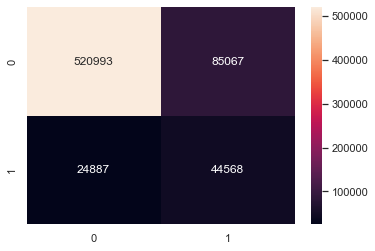

*******************************************
feature importance of top 50 features


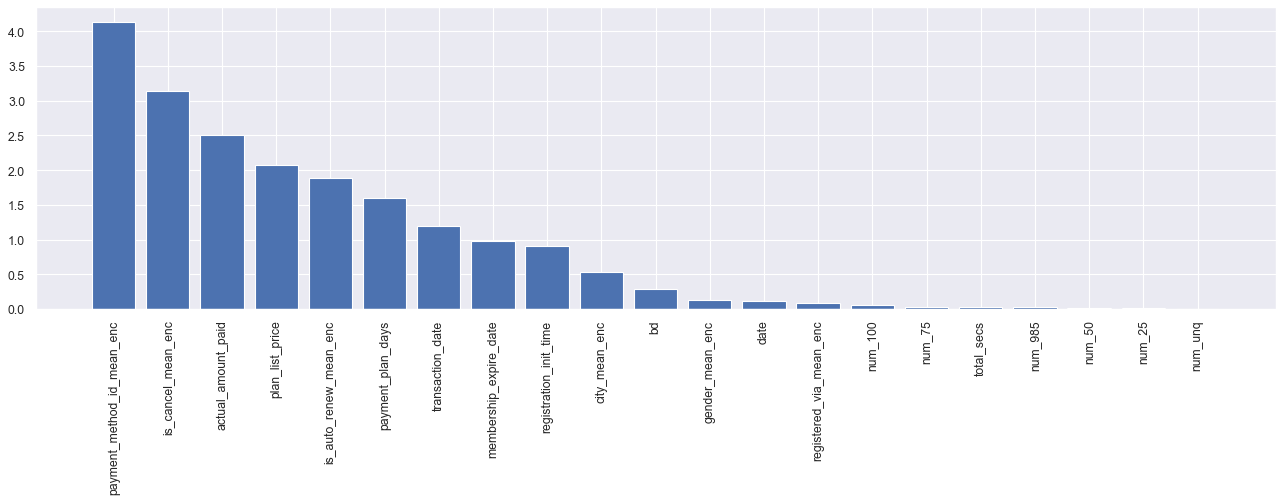

In [35]:
from sklearn.linear_model import LogisticRegression
feature_importance_lr=[]
feature_importance_values_lr=[]
reg=[]
loss_all=[]


sample_points_train=int(0.4*X_train.shape[0])
sample_points_cv=int(0.4*X_cv.shape[0])

#hyperparameter tuning

for i in [10**i for i in range(-5,5)]:
    model=LogisticRegression(C=i,n_jobs=-1,random_state=110,class_weight='balanced')
    print("Model is training")
    model.fit(X_train[:sample_points_train],Y_train[:sample_points_train])
    print("Done")
    y_pred_proba=model.predict_proba(X_cv[:sample_points_cv])
    y_pred=model.predict(X_cv[:sample_points_cv])
    loss=result(y_pred,y_pred_proba,Y_cv[:sample_points_cv])
    reg.append(i)
    loss_all.append(loss)
hyperparameter=lowest(reg,loss_all)


# training model with best hyperparameter

print("********************************************")
print("Training model with best hyperparameter")
model=LogisticRegression(C=hyperparameter,n_jobs=-1,random_state=110,class_weight='balanced')
print("Model is training")
model.fit(X_train,Y_train)
print("Done")
y_pred_proba=model.predict_proba(X_cv)
y_pred=model.predict(X_cv)
loss=result(y_pred,y_pred_proba,Y_cv,confusion=1)



# visualizing

print("*******************************************")
figure(num=None, figsize=(20,5), dpi=80, facecolor='w', edgecolor='k')
feature_name=[train_features[i] for i in np.argsort(np.abs(model.coef_)[0])[::-1]]
feature_importance=[np.abs(model.coef_)[0][i] for i in np.argsort(np.abs(model.coef_)[0])[::-1]]
print("feature importance of top 50 features")
plt.bar(feature_name[:50],feature_importance[:50])
plt.xticks(rotation=90)
plt.plot()
feature_importance_lr.append(feature_name)
feature_importance_values_lr.append(feature_importance)


# Logistic Regression with L1 penalty

Model is training
Done
log loss is  0.5281764936950406
F1 score is 0.4292039025989997
Model is training
Done
log loss is  0.49823215031400364
F1 score is 0.4641655143624931
Model is training
Done
log loss is  0.49781970459132263
F1 score is 0.4513288847963469
Model is training
Done
log loss is  0.49802316668398156
F1 score is 0.450615025547215
Model is training
Done
log loss is  0.4980533429670852
F1 score is 0.4506256938137047
Model is training
Done
log loss is  0.4980567932533118
F1 score is 0.45066797865495967
Model is training
Done
log loss is  0.4980571105051503
F1 score is 0.45066797865495967
Model is training
Done
log loss is  0.49805714225987485
F1 score is 0.45066797865495967
The best hyperparameter is  0.01 and the lowest loss associaed with it  0.49781970459132263
********************************************
Training model with best hyperparameter
Model is training
Done
log loss is  0.24633982822719022
F1 score is 0.47751975536649605


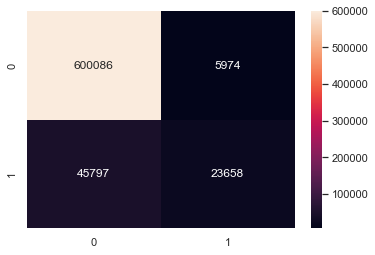

*******************************************
feature importance of top 50 features


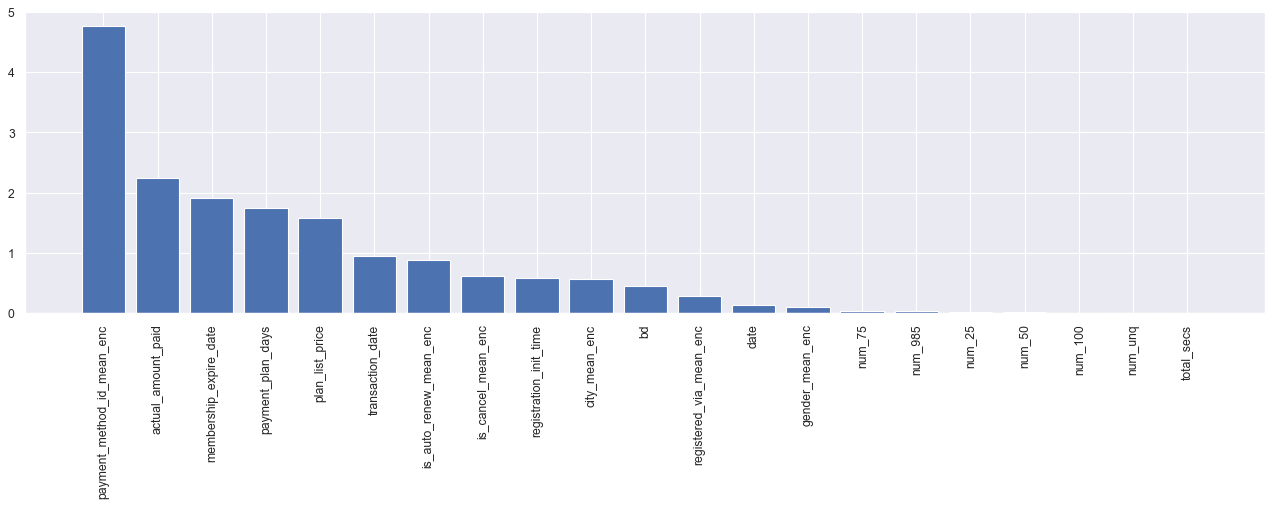

In [36]:
from sklearn.linear_model import LogisticRegression
feature_importance_lr=[]
feature_importance_values_lr=[]
reg=[]
loss_all=[]


sample_points_train=int(0.4*X_train.shape[0])
sample_points_cv=int(0.4*X_cv.shape[0])

#hyperparameter tuning

for i in [10**i for i in range(-4,4)]:
    model=LogisticRegression(C=i,n_jobs=-1,random_state=110,penalty='l1',solver='liblinear',class_weight='balanced')
    print("Model is training")
    model.fit(X_train[:sample_points_train],Y_train[:sample_points_train])
    print("Done")
    y_pred_proba=model.predict_proba(X_cv[:sample_points_cv])
    y_pred=model.predict(X_cv[:sample_points_cv])
    loss=result(y_pred,y_pred_proba,Y_cv[:sample_points_cv])
    reg.append(i)
    loss_all.append(loss)
hyperparameter=lowest(reg,loss_all)


# training model with best hyperparameter

print("********************************************")
print("Training model with best hyperparameter")
model=LogisticRegression(C=hyperparameter,n_jobs=-1,random_state=110,penalty='l1',solver='liblinear')
print("Model is training")
model.fit(X_train,Y_train)
print("Done")
y_pred_proba=model.predict_proba(X_cv)
y_pred=model.predict(X_cv)
loss=result(y_pred,y_pred_proba,Y_cv,confusion=1)
print("*******************************************")

# visualizing

figure(num=None, figsize=(20,5), dpi=80, facecolor='w', edgecolor='k')
feature_name=[train_features[i] for i in np.argsort(np.abs(model.coef_)[0])[::-1]]
feature_importance=[np.abs(model.coef_)[0][i] for i in np.argsort(np.abs(model.coef_)[0])[::-1]]
print("feature importance of top 50 features")
plt.bar(feature_name[:50],feature_importance[:50])
plt.xticks(rotation=90)
plt.plot()
feature_importance_lr.append(feature_name)
feature_importance_values_lr.append(feature_importance)

# SGD with l2 penalty (class balance)

Model is training
Done
log loss is  0.24072749928171405
F1 score is 0.4752379743622287
Model is training
Done
log loss is  0.2387537851956937
F1 score is 0.4701065534165756
Model is training
Done
log loss is  0.24123750876474617
F1 score is 0.44944691409076815
Model is training
Done
log loss is  0.2365261477130529
F1 score is 0.48925214957008606
Model is training
Done
log loss is  0.2363538735323198
F1 score is 0.48936223405585133
Model is training
Done
log loss is  0.2371102154287679
F1 score is 0.48750657878248665
Model is training
Done
log loss is  0.307111507331989
F1 score is 0.10202162670427832
Model is training
Done
log loss is  0.3286126793273893
F1 score is 7.219955958268655e-05
Model is training
Done
log loss is  0.3286126813094196
F1 score is 7.219955958268655e-05
Model is training
Done
log loss is  0.328612680381586
F1 score is 7.219955958268655e-05
The best hyperparameter is  0.1 and the lowest loss associaed with it  0.2363538735323198
************************************

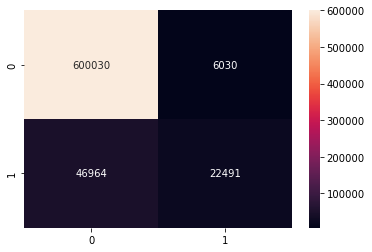

*******************************************
feature importance of top 50 features


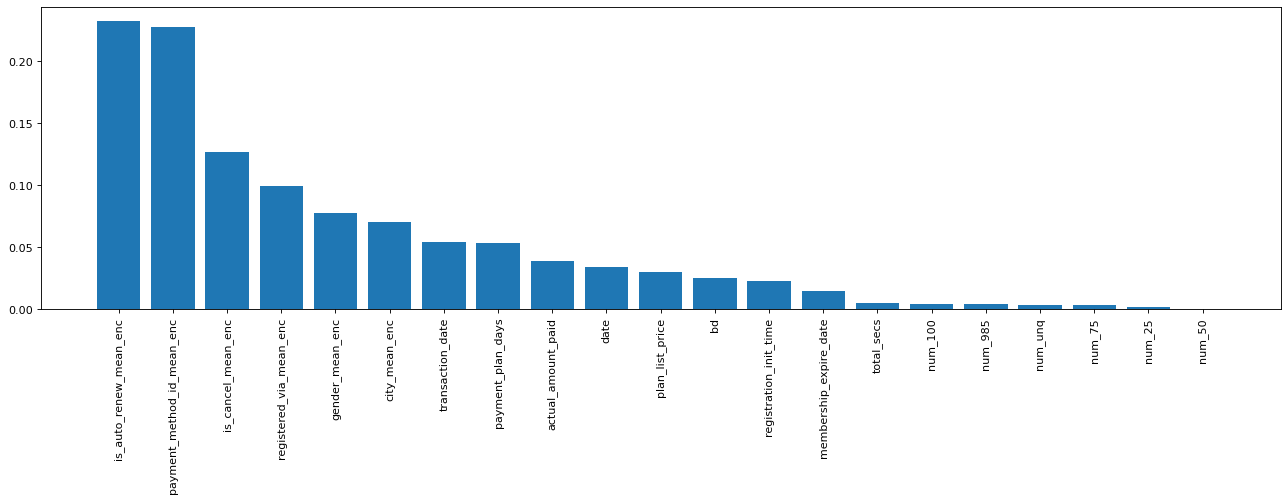

In [43]:
feature_importance_sgd=[]
feature_importance_values_sgd=[]
reg=[]
loss_all=[]

#using a sample to find hyperparameter
sample_points_train=int(0.4*X_train.shape[0])
sample_points_cv=int(0.4*X_cv.shape[0])

#hyperparameter tuning

for i in [10**i for i in range(-5,5)]:
    model=SGDClassifier(loss='hinge',alpha=i,n_jobs=-1,random_state=110,class_weight='balanced')
    print("Model is training")
    model.fit(X_train[:sample_points_train],Y_train[:sample_points_train])
    calibration=CalibratedClassifierCV(model,method='isotonic')
    calibration.fit(X_train[int(0.4*X_train.shape[0]):int(0.5*X_train.shape[0])],Y_train[int(0.4*X_train.shape[0]):int(0.5*X_train.shape[0])])
    print("Done")
    y_pred_proba=calibration.predict_proba(X_cv[:sample_points_cv])
    y_pred=calibration.predict(X_cv[:sample_points_cv])
    loss=result(y_pred,y_pred_proba,Y_cv[:sample_points_cv])
    reg.append(i)
    loss_all.append(loss)
    
    
# training model with best hyperparameter

hyperparameter=lowest(reg,loss_all)
print("********************************************")
print("Training model with best hyperparameter")
model=SGDClassifier(loss='log',alpha=hyperparameter,n_jobs=-1,random_state=110)
print("Model is training")
model.fit(X_train,Y_train)
calibration=CalibratedClassifierCV(model,method='isotonic')
calibration.fit(X_train[int(0.4*X_train.shape[0]):int(0.5*X_train.shape[0])],Y_train[int(0.4*X_train.shape[0]):int(0.5*X_train.shape[0])])
print("Done")
y_pred_proba=calibration.predict_proba(X_cv)
y_pred=calibration.predict(X_cv)
loss=result(y_pred,y_pred_proba,Y_cv,confusion=1)



# visualizing
print("*******************************************")
figure(num=None, figsize=(20,5), dpi=80, facecolor='w', edgecolor='k')
feature_name=[train_features[i] for i in np.argsort(np.abs(model.coef_)[0])[::-1]]
feature_importance=[np.abs(model.coef_)[0][i] for i in np.argsort(np.abs(model.coef_)[0])[::-1]]
print("feature importance of top 50 features")
plt.bar(feature_name[:50],feature_importance[:50])
plt.xticks(rotation=90)
plt.plot()
feature_importance_sgd.append(feature_name)
feature_importance_values_sgd.append(feature_importance)

# SGD with l1 penalty (class balance)

Model is training
Done
log loss is  0.23667181794729397
F1 score is 0.4751997970315869
Model is training
Done
log loss is  0.23861906038680544
F1 score is 0.4746321664129883
Model is training
Done
log loss is  0.24102502796848443
F1 score is 0.4498282408244441
Model is training
Done
log loss is  0.24813500062856958
F1 score is 0.48429589703548853
Model is training
Done
log loss is  0.3305298996444466
F1 score is 0.0
Model is training
Done
log loss is  0.3305298996444466
F1 score is 0.0
Model is training
Done
log loss is  0.3305298996444466
F1 score is 0.0
Model is training
Done
log loss is  0.3305298996444466
F1 score is 0.0
Model is training
Done
log loss is  0.3305298996444466
F1 score is 0.0
Model is training
Done
log loss is  0.3305298996444466
F1 score is 0.0
The best hyperparameter is  1e-05 and the lowest loss associaed with it  0.23667181794729397
********************************************
Training model with best hyperparameter
Model is training
Done
log loss is  0.240982024

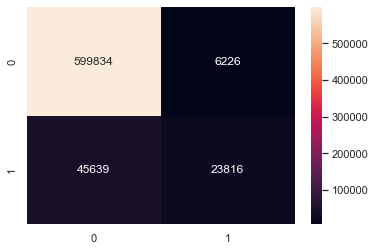

*******************************************
feature importance of top 50 features


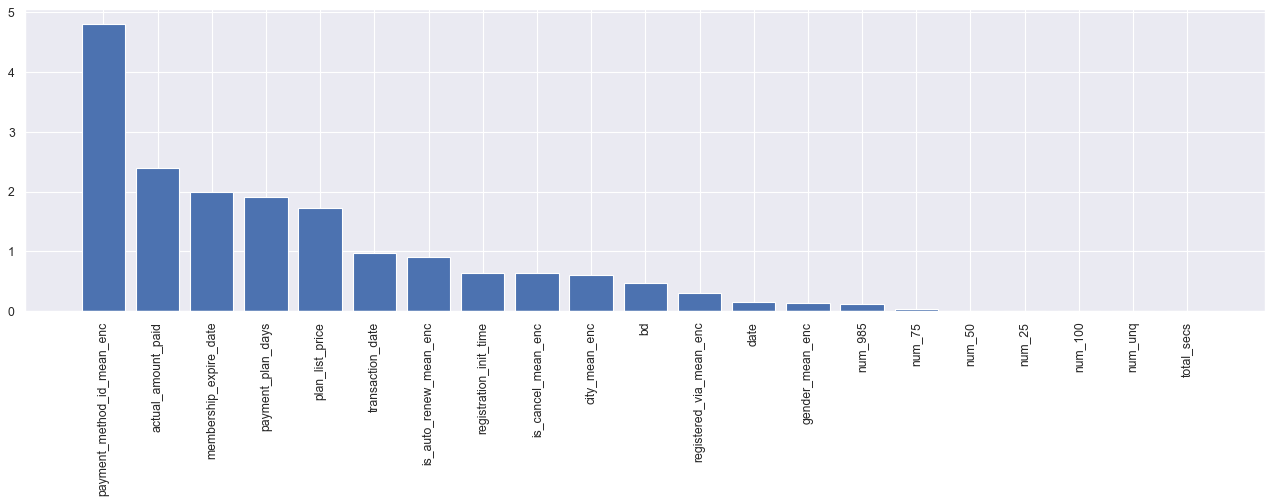

In [48]:
feature_importance_sgd=[]
feature_importance_values_sgd=[]
reg=[]
loss_all=[]


#using a sample to find hyperparameter

sample_points_train=int(0.4*X_train.shape[0])
sample_points_cv=int(0.4*X_cv.shape[0])



#hyperparameter tuning

for i in [10**i for i in range(-5,5)]:
    model=SGDClassifier(loss='hinge',alpha=i,n_jobs=-1,random_state=110, penalty='l1')
    print("Model is training")
    model.fit(X_train[:sample_points_train],Y_train[:sample_points_train])
    calibration=CalibratedClassifierCV(model,method='isotonic')
    calibration.fit(X_train[int(0.4*X_train.shape[0]):int(0.5*X_train.shape[0])],Y_train[int(0.4*X_train.shape[0]):int(0.5*X_train.shape[0])])
    print("Done")
    y_pred_proba=calibration.predict_proba(X_cv[:sample_points_cv])
    y_pred=calibration.predict(X_cv[:sample_points_cv])
    loss=result(y_pred,y_pred_proba,Y_cv[:sample_points_cv])
    reg.append(i)
    loss_all.append(loss)
hyperparameter=lowest(reg,loss_all)

# training model with best hyperparameter
print("********************************************")
print("Training model with best hyperparameter")
model=SGDClassifier(loss='log',alpha=hyperparameter,n_jobs=-1,random_state=110, penalty='l1')
print("Model is training")
model.fit(X_train,Y_train)
calibration=CalibratedClassifierCV(model,method='isotonic')
calibration.fit(X_train[int(0.4*X_train.shape[0]):int(0.5*X_train.shape[0])],Y_train[int(0.4*X_train.shape[0]):int(0.5*X_train.shape[0])])
print("Done")
y_pred_proba=calibration.predict_proba(X_cv)
y_pred=calibration.predict(X_cv)
loss=result(y_pred,y_pred_proba,Y_cv,confusion=1)
print("*******************************************")



# visualizing

figure(num=None, figsize=(20,5), dpi=80, facecolor='w', edgecolor='k')
feature_name=[train_features[i] for i in np.argsort(np.abs(model.coef_)[0])[::-1]]
feature_importance=[np.abs(model.coef_)[0][i] for i in np.argsort(np.abs(model.coef_)[0])[::-1]]
print("feature importance of top 50 features")
plt.bar(feature_name[:50],feature_importance[:50])
plt.xticks(rotation=90)
plt.plot()
feature_importance_sgd.append(feature_name)
feature_importance_values_sgd.append(feature_importance)

# LGBMClassifier

Model is training
Done
log loss is  0.09258046381134348
F1 score is 0.8263155889189497
Model is training
Done
log loss is  0.08474729962736782
F1 score is 0.836771062409949
Model is training
Done
log loss is  0.08257698915058784
F1 score is 0.8395085066162572
Model is training
Done
log loss is  0.08080670767727278
F1 score is 0.8432385549438117
Model is training
Done
log loss is  0.08798948331868743
F1 score is 0.8315867551684133
Model is training
Done
log loss is  0.08114419206498515
F1 score is 0.8431543116490168
Model is training
Done
log loss is  0.07892335412684119
F1 score is 0.8455572956959827
Model is training
Done
log loss is  0.07766230654031964
F1 score is 0.8485349672035635
Model is training
Done
log loss is  0.08063489620430954
F1 score is 0.843326080787059
Model is training
Done
log loss is  0.07539235416174533
F1 score is 0.8545648952334501
Model is training
Done
log loss is  0.07379369194192335
F1 score is 0.857191004924448
Model is training
Done
log loss is  0.07242209

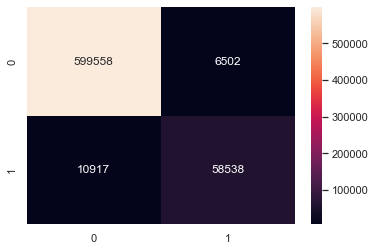

*******************************************


In [52]:
import lightgbm 
from lightgbm import LGBMClassifier 
hyp=[]
feature_importance_lgb=[]
feature_importance_values_lgb=[]
loss_all=[]


#hyperparameter tuning

for i in [100,200,500,1000]:
    for j in [30,60,80,100]:
        model=LGBMClassifier(boosting_type='gbdt', max_depth=- 1, num_leaves=j,learning_rate=0.1, n_estimators=i, objective=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20,subsample=1.0, subsample_freq=0, colsample_bytree=1.0,reg_alpha=0.0, reg_lambda=0.0, random_state=110, n_jobs=- 1)
        print("Model is training")
        model.fit(X_train[:sample_points_train],Y_train[:sample_points_train])
        print("Done")
        y_pred_proba=model.predict_proba(X_cv[:sample_points_cv])
        y_pred=model.predict(X_cv[:sample_points_cv])
        loss=result(y_pred,y_pred_proba,Y_cv[:sample_points_cv])
        hyp.append((i,j))
        loss_all.append(loss)
hyperparameter=lowest(hyp,loss_all)
print("********************************************")
print("Training model with best hyperparameter")

# training model with best hyperparameter

model=LGBMClassifier(boosting_type='gbdt', max_depth=- 1,
               learning_rate=0.1, n_estimators=hyperparameter[0],  num_leaves=hyperparameter[1],
               subsample_for_bin=200000, objective=None, 
               class_weight=None, min_split_gain=0.0, 
               min_child_weight=0.001, min_child_samples=20,
               subsample=1.0, subsample_freq=0, colsample_bytree=1.0,
               reg_alpha=0.0, reg_lambda=0.0, random_state=110, n_jobs=- 1)
print("Model is training")
model.fit(X_train,Y_train)
print("Done")
y_pred_proba=model.predict_proba(X_cv)
y_pred=model.predict(X_cv)
loss=result(y_pred,y_pred_proba,Y_cv,confusion=1)
print("*******************************************")



In [54]:
import pickle


In [55]:
pickle.dump(clf,open('pre_model.pkl','wb')) #saving our model in .pkl file


In [56]:
pickle.dump(sig_clf,open('pre_model.pkl','wb'))

In [57]:
with open('pre_model.pkl', 'rb')as f:
    data = pickle.load(f)
    


In [58]:
data

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=10, random_state=42))